In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Credit card transaction.csv')
df = df.drop(df.columns[0], axis=1)
df = df.dropna()


In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

df = df.drop(columns=['trans_date_trans_time'])


In [17]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'merch_zipcode', 'trans_year', 'trans_month',
       'trans_day', 'trans_hour'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
y_pred_proba = pipeline.predict_proba(X)[:, 1]

df['fraud_likelihood'] = y_pred_proba

y_test_pred = pipeline.predict(X_test)
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9943316013226263
ROC AUC Score: 0.9979659589534597


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     12593
           1       0.97      0.35      0.51       109

    accuracy                           0.99     12702
   macro avg       0.98      0.67      0.76     12702
weighted avg       0.99      0.99      0.99     12702



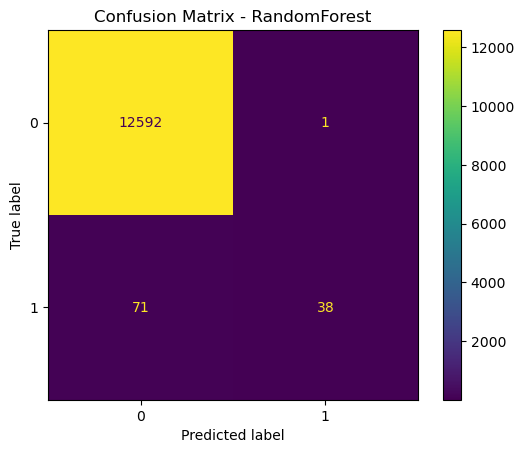

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_year,trans_month,trans_day,trans_hour,fraud_likelihood
0,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1325376018,36.011293,-82.048315,0,28705.0,2019,1,1,0,0.00
2,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1325376051,43.150704,-112.154481,0,83236.0,2019,1,1,0,0.00
4,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1325376186,38.674999,-78.632459,0,22844.0,2019,1,1,0,0.00
5,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,1325376248,40.653382,-76.152667,0,17972.0,2019,1,1,0,0.01
7,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,1325376308,38.948089,-78.540296,0,22644.0,2019,1,1,0,0.00


In [20]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - RandomForest')
plt.show()

df.head()